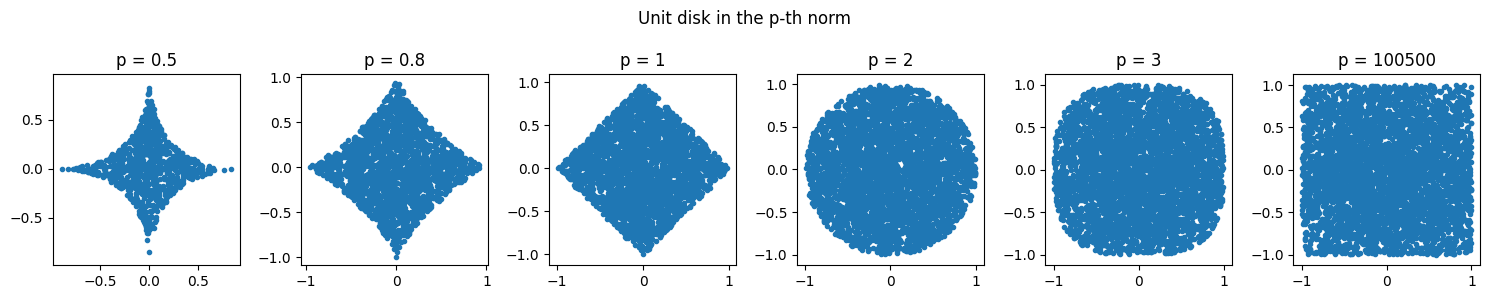

In [45]:
%matplotlib inline
import jax
from jax import numpy as jnp, vmap
import matplotlib.pyplot as plt

p_values = [0.5, 0.8, 1,2,3,100500]
M = 10000 # Number of sampling points

def compute_points(p, key):
    a = jax.random.normal(key, (1, 2))
    norm_value = jnp.linalg.norm(a[0, :], p)
    return jnp.where(norm_value <= 1, a[0, :], jnp.array([float('nan'), float('nan')]))

fig, axes = plt.subplots(1, len(p_values), figsize=(2.5*len(p_values), 3))
axes = axes.ravel()

for i, p in enumerate(p_values):
    keys = jax.random.split(jax.random.PRNGKey(i), M)  # Note: Modified key generation to make samples unique per `p`
    results = vmap(lambda k: compute_points(p, k))(keys)
    valid_points = results[~jnp.isnan(results[:, 0])]
    axes[i].plot(valid_points[:, 0], valid_points[:, 1], '.')
    axes[i].axis('equal')
    axes[i].set_title(f'p = {p}')

plt.suptitle('Unit disk in the p-th norm')
plt.tight_layout()  # Adjust layout to ensure proper visualization
plt.savefig("p_balls.svg")
plt.show()
